In [ ]:
#Importing the required libraries:
import os
import sys
import torch
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Hari/Evaluation/LensFinding/")
print("Changed directory to:", os.getcwd())  # Verify the change

Changed directory to: /content/drive/MyDrive/Hari/Evaluation/LensFinding


In [ ]:
# Loading the train dataset
train_data = np.load("/content/drive/MyDrive/Hari/Evaluation/LensFinding/data/train_data.npz")
train_images, train_labels = train_data["images"], train_data["labels"]

# Loading the test dataset
val_data = np.load("/content/drive/MyDrive/Hari/Evaluation/LensFinding/data/test_data.npz")
val_images, val_labels = val_data["images"], val_data["labels"]


In [ ]:
#Making a Test set from the Validation dataset:
from sklearn.model_selection import train_test_split

# Split into new validation (80%) and test (20%)
val_images, test_images, val_labels, test_labels = train_test_split(
    val_images, val_labels, test_size=0.20, stratify=val_labels, random_state=42
)


In [ ]:
print(f"Train set: {train_images.shape}, Labels: {train_labels.shape}")
print(f"Validation set: {val_images.shape}, Labels: {val_labels.shape}")
print(f"Test set: {test_images.shape}, Labels: {test_labels.shape}")

Train set: (30405, 3, 64, 64), Labels: (30405,)
Validation set: (15720, 3, 64, 64), Labels: (15720,)
Test set: (3930, 3, 64, 64), Labels: (3930,)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
train_images_tensor = torch.tensor(train_images, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

val_images_tensor = torch.tensor(val_images, dtype=torch.float32)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

test_images_tensor = torch.tensor(val_images, dtype=torch.float32)
test_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

# Create TensorDataset
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_images_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# Create DataLoaders
batch_size = 200  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Check a batch
for images, labels in train_loader:
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")
    break


Batch shape: torch.Size([200, 3, 64, 64]), Labels shape: torch.Size([200])


Training Metrics set for handling data imbalance:


1.   We expect high accuracy from the model since most of the data is simply non_lense images. But when we look at the ROC and AUC class wise, we expect to see the real problem.
2.   The model will likely have a very good AUC score for the non_lense class but very bad score is expected for the lense class due to this huge imbalance.
3.   Most popular ways to handle data imbalance include data upsampling from underrep class and downsampling from over rep class, SMOTE and many more.
4.   For this round of training I will implement a very basic yet powerful method to handle data imbalance, i.e, a weighted loss of somekind.
5.   What this will do is that the wrong classification of the under represented class will be given a greater weight , this will cause that step's grad update to be more influential. This should help the model classify the under represented class in a more better way.
6.   If we don't see any satisfactory result using this approach, we will look at some other methods in the next training rounds.



In [ ]:
sys.path.append("./src")

In [ ]:
from model import ResNet20
from train import train_model

In [ ]:
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet20().to(device)
end_time = time.time()
print(f"Model loaded! Time taken: {end_time - start_time:.2f} sec")

Model loaded! Time taken: 0.43 sec


In [ ]:
epochs = 20
learning_rate = 0.0003

In [ ]:
train_losses, val_losses, train_accs, val_accs, val_aucs = train_model(
    model, train_loader, val_loader, device, epochs, learning_rate
)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:28: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Training started!

🔹 Epoch 1/20 started


Epoch 1 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 1 Training: 100%|██████████| 153/153 [00:15<00:00, 10.17it/s]


📊 [Epoch 1/20] Train Loss: 0.883560 | Train Acc: 0.358 | Val Loss: 1.182807 | Val Acc: 0.583 | Val AUC: 0.8646
Saved new best model with Val AUC: 0.8646

🔹 Epoch 2/20 started


Epoch 2 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 2 Training: 100%|██████████| 153/153 [00:13<00:00, 11.66it/s]


📊 [Epoch 2/20] Train Loss: 0.822506 | Train Acc: 0.409 | Val Loss: 1.180381 | Val Acc: 0.524 | Val AUC: 0.9094
Saved new best model with Val AUC: 0.9094

🔹 Epoch 3/20 started


Epoch 3 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 3 Training: 100%|██████████| 153/153 [00:13<00:00, 11.65it/s]


📊 [Epoch 3/20] Train Loss: 0.779211 | Train Acc: 0.485 | Val Loss: 1.256397 | Val Acc: 0.594 | Val AUC: 0.9216
Saved new best model with Val AUC: 0.9216

🔹 Epoch 4/20 started


Epoch 4 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 4 Training: 100%|██████████| 153/153 [00:13<00:00, 11.66it/s]


📊 [Epoch 4/20] Train Loss: 0.764763 | Train Acc: 0.534 | Val Loss: 1.150820 | Val Acc: 0.691 | Val AUC: 0.8952

🔹 Epoch 5/20 started


Epoch 5 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 5 Training: 100%|██████████| 153/153 [00:12<00:00, 11.85it/s]


📊 [Epoch 5/20] Train Loss: 0.750692 | Train Acc: 0.559 | Val Loss: 1.151273 | Val Acc: 0.781 | Val AUC: 0.8604

🔹 Epoch 6/20 started


Epoch 6 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 6 Training: 100%|██████████| 153/153 [00:12<00:00, 11.90it/s]


📊 [Epoch 6/20] Train Loss: 0.744091 | Train Acc: 0.586 | Val Loss: 1.327476 | Val Acc: 0.704 | Val AUC: 0.9180

🔹 Epoch 7/20 started


Epoch 7 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 7 Training: 100%|██████████| 153/153 [00:12<00:00, 11.87it/s]


📊 [Epoch 7/20] Train Loss: 0.737421 | Train Acc: 0.605 | Val Loss: 1.269085 | Val Acc: 0.460 | Val AUC: 0.9553
Saved new best model with Val AUC: 0.9553

🔹 Epoch 8/20 started


Epoch 8 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 8 Training: 100%|██████████| 153/153 [00:13<00:00, 11.75it/s]


📊 [Epoch 8/20] Train Loss: 0.729078 | Train Acc: 0.617 | Val Loss: 1.125783 | Val Acc: 0.814 | Val AUC: 0.9401

🔹 Epoch 9/20 started


Epoch 9 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 9 Training: 100%|██████████| 153/153 [00:13<00:00, 11.59it/s]


📊 [Epoch 9/20] Train Loss: 0.723807 | Train Acc: 0.626 | Val Loss: 1.144851 | Val Acc: 0.752 | Val AUC: 0.9453

🔹 Epoch 10/20 started


Epoch 10 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 10 Training: 100%|██████████| 153/153 [00:13<00:00, 11.77it/s]


📊 [Epoch 10/20] Train Loss: 0.723065 | Train Acc: 0.649 | Val Loss: 1.122913 | Val Acc: 0.845 | Val AUC: 0.9407

🔹 Epoch 11/20 started


Epoch 11 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 11 Training: 100%|██████████| 153/153 [00:13<00:00, 11.74it/s]


📊 [Epoch 11/20] Train Loss: 0.722878 | Train Acc: 0.630 | Val Loss: 1.134282 | Val Acc: 0.795 | Val AUC: 0.9371

🔹 Epoch 12/20 started


Epoch 12 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 12 Training: 100%|██████████| 153/153 [00:12<00:00, 11.87it/s]


📊 [Epoch 12/20] Train Loss: 0.724264 | Train Acc: 0.654 | Val Loss: 1.124199 | Val Acc: 0.831 | Val AUC: 0.9388

🔹 Epoch 13/20 started


Epoch 13 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 13 Training: 100%|██████████| 153/153 [00:12<00:00, 11.83it/s]


📊 [Epoch 13/20] Train Loss: 0.719844 | Train Acc: 0.651 | Val Loss: 1.124648 | Val Acc: 0.794 | Val AUC: 0.9316

🔹 Epoch 14/20 started


Epoch 14 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 14 Training: 100%|██████████| 153/153 [00:12<00:00, 11.82it/s]


📊 [Epoch 14/20] Train Loss: 0.718420 | Train Acc: 0.653 | Val Loss: 1.126319 | Val Acc: 0.775 | Val AUC: 0.9405

🔹 Epoch 15/20 started


Epoch 15 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 15 Training: 100%|██████████| 153/153 [00:12<00:00, 11.91it/s]


📊 [Epoch 15/20] Train Loss: 0.718616 | Train Acc: 0.656 | Val Loss: 1.126218 | Val Acc: 0.776 | Val AUC: 0.9439

🔹 Epoch 16/20 started


Epoch 16 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 16 Training: 100%|██████████| 153/153 [00:13<00:00, 11.72it/s]


📊 [Epoch 16/20] Train Loss: 0.717194 | Train Acc: 0.652 | Val Loss: 1.122180 | Val Acc: 0.812 | Val AUC: 0.9377

🔹 Epoch 17/20 started


Epoch 17 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 17 Training: 100%|██████████| 153/153 [00:12<00:00, 11.84it/s]


📊 [Epoch 17/20] Train Loss: 0.716083 | Train Acc: 0.649 | Val Loss: 1.127929 | Val Acc: 0.792 | Val AUC: 0.9458

🔹 Epoch 18/20 started


Epoch 18 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 18 Training: 100%|██████████| 153/153 [00:12<00:00, 11.87it/s]


📊 [Epoch 18/20] Train Loss: 0.719493 | Train Acc: 0.652 | Val Loss: 1.123205 | Val Acc: 0.844 | Val AUC: 0.9382

🔹 Epoch 19/20 started


Epoch 19 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 19 Training: 100%|██████████| 153/153 [00:12<00:00, 11.89it/s]


📊 [Epoch 19/20] Train Loss: 0.715602 | Train Acc: 0.658 | Val Loss: 1.125963 | Val Acc: 0.782 | Val AUC: 0.9458

🔹 Epoch 20/20 started


Epoch 20 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 20 Training: 100%|██████████| 153/153 [00:12<00:00, 11.80it/s]


📊 [Epoch 20/20] Train Loss: 0.720782 | Train Acc: 0.649 | Val Loss: 1.116065 | Val Acc: 0.838 | Val AUC: 0.9368


In [ ]:
print("Train_Losses : \n",train_losses)
print("Val_Losses :  \n",val_losses)
print("Train_Accs :  \n",train_accs)
print("Val_Accs :  \n",val_accs)
print("Val_AUCs : \n",val_aucs)

Train_Losses : 
 [0.8835601218533622, 0.8225060217946283, 0.7792107332421259, 0.7647627359980561, 0.7506916500827706, 0.744090962656978, 0.7374207544113104, 0.7290780736297943, 0.7238069146582414, 0.723065065290755, 0.7228784310623643, 0.7242638966378914, 0.7198437102392617, 0.7184203422455739, 0.7186163389414201, 0.7171940246982571, 0.716082697674507, 0.7194933135382852, 0.715602006964769, 0.720781841843247]
Val_Losses :  
 [1.182806781230082, 1.1803814359293638, 1.2563967950471484, 1.1508196865329305, 1.1512730332427958, 1.327476391962163, 1.2690849824412784, 1.1257827532200413, 1.1448508369103643, 1.1229128158122832, 1.1342820493319563, 1.1241987195937082, 1.1246476682997841, 1.1263187118158995, 1.1262183915871093, 1.1221804967666704, 1.127928502080398, 1.123205125786876, 1.125963048322207, 1.1160647037981728]
Train_Accs :  
 [0.3583292221674067, 0.4089458970564052, 0.4853478046373952, 0.5342542345009045, 0.5591843446801513, 0.5861207038316066, 0.6052294030587074, 0.6165104423614537

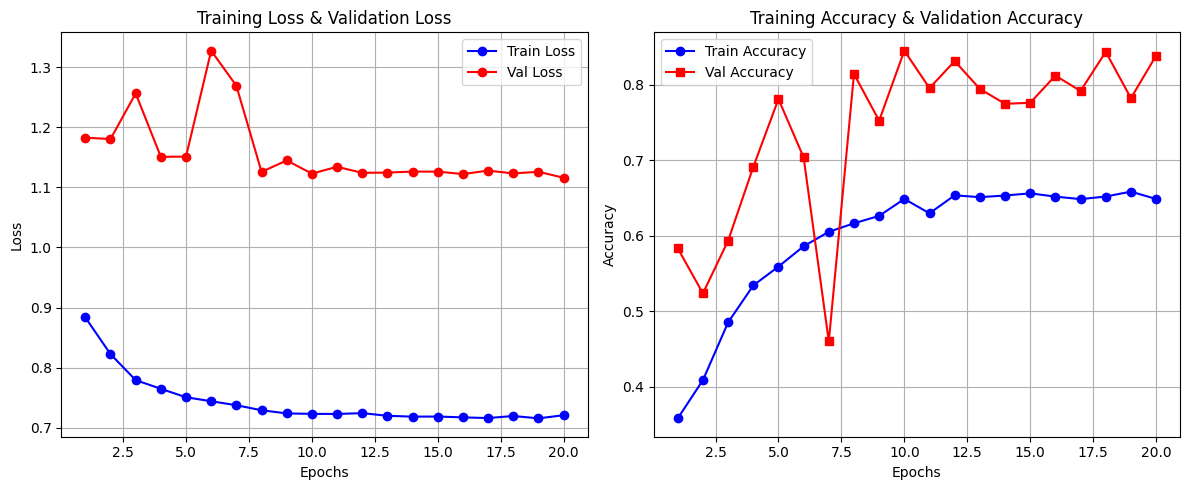

In [ ]:
epochs_ = range(1,len(train_losses)+1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_, train_losses, label="Train Loss", marker="o", color="blue")
plt.plot(epochs_, val_losses, label="Val Loss", marker="o", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss & Validation Loss")
plt.legend()
plt.grid(True)

# Plot Validation Loss & Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_, train_accs, label="Train Accuracy", marker="o", color="blue")
plt.plot(epochs_, val_accs, label="Val Accuracy", marker="s", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

def evaluate_model_on_test(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    model.to(device)

    all_labels = []
    all_probs = []
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Get model outputs
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            predicted = torch.argmax(probs, dim=1)

            # Store labels and probabilities
            all_labels.extend(labels.cpu().numpy())  # True labels
            all_probs.extend(probs.cpu().numpy())  # Probabilities for both classes

            # Compute accuracy
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Convert lists to NumPy arrays
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Compute overall accuracy
    test_accuracy = correct / total

    auc_scores=[]
    # Compute AUC-ROC separately for both classes
    #For class 0 = Non_lenses
    auc_scores.append(roc_auc_score(all_labels, all_probs[:,0], multi_class="ovr", average=None))
    #For class 1 = Lenses
    auc_scores.append(roc_auc_score(all_labels, all_probs[:,1], multi_class="ovr", average=None))


    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"AUC for Non-Lenses (Class 0): {auc_scores[0]:.4f}")
    print(f"AUC for Lenses (Class 1): {auc_scores[1]:.4f}")

    # Plot ROC Curves
    fpr_0, tpr_0, _ = roc_curve(all_labels, all_probs[:, 0], pos_label=0)  # Non-lenses
    fpr_1, tpr_1, _ = roc_curve(all_labels, all_probs[:, 1], pos_label=1)  # Lenses

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_0, tpr_0, label=f'Class 0 (Non-Lenses) AUC={auc_scores[0]:.4f}')
    plt.plot(fpr_1, tpr_1, label=f'Class 1 (Lenses) AUC={auc_scores[1]:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Test Set")
    plt.legend()
    plt.grid()
    plt.show()

    return test_accuracy, auc_scores


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import torch
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model_on_test(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    model.to(device)

    all_labels = []
    all_probs = []
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Get model outputs
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
            predicted = torch.argmax(probs, dim=1)

            # Store labels and probabilities
            all_labels.extend(labels.cpu().numpy())  # True labels
            all_probs.extend(probs.cpu().numpy())  # Probabilities for both classes

            # Compute accuracy
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Convert lists to NumPy arrays
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Compute overall accuracy
    test_accuracy = correct / total

    # Compute AUC for both classes (One-vs-Rest)
    auc_class_1 = roc_auc_score(all_labels, all_probs[:, 1])  # AUC for Lenses (Class 1)
    auc_class_0 = roc_auc_score(1 - all_labels, all_probs[:, 0])  # AUC for Non-Lenses (Class 0)

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"AUC for Non-Lenses (Class 0): {auc_class_0:.4f}")
    print(f"AUC for Lenses (Class 1): {auc_class_1:.4f}")

    # Plot ROC Curves
    fpr_0, tpr_0, _ = roc_curve(all_labels, all_probs[:, 0], pos_label=0)  # Non-lenses
    fpr_1, tpr_1, _ = roc_curve(all_labels, all_probs[:, 1], pos_label=1)  # Lenses

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_0, tpr_0, label=f'Non-Lenses (Class 0) AUC={auc_class_0:.4f}', color='blue')
    plt.plot(fpr_1, tpr_1, label=f'Lenses (Class 1) AUC={auc_class_1:.4f}', color='red')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Test Set")
    plt.legend()
    plt.grid()
    plt.show()

    return test_accuracy, (auc_class_0, auc_class_1)


Test Accuracy: 0.4601
AUC for Non-Lenses (Class 0): 0.9553
AUC for Lenses (Class 1): 0.9553


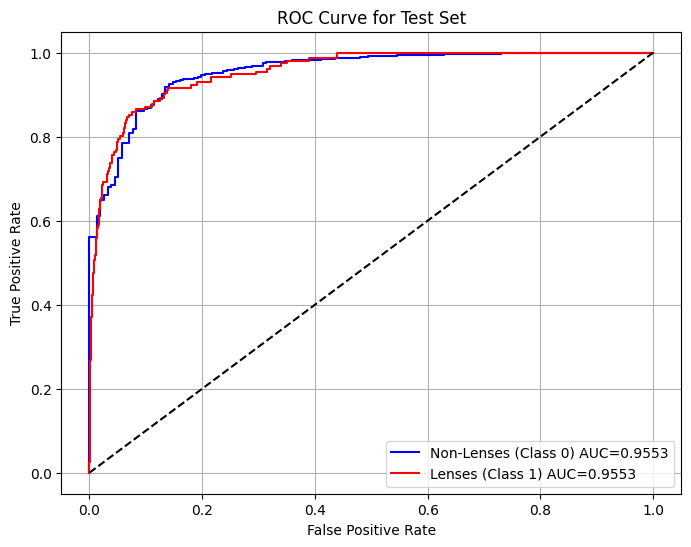

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/Hari/Evaluation/LensFinding/results/best_model.pth"))
test_accuracy, test_auc_scores = evaluate_model_on_test(model, test_loader, device)